In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 100
import seaborn as sns

# Import the data

In [3]:
train_X = pd.read_csv('train_features.csv', index_col='match_id_hash')
train_X.head(3)

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0.0,0,0,0,0,0.0,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0.0,0,0,0,0,0.0,0,0,0,0
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,...,0.0,0,0,0,0,0.0,0,0,0,0


In [4]:
train_X.describe()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
count,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,...,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000
mean,1146.082798,19.584776,4.772350,6.524865,7.338500,51.103138,3.147876,3.268809,4.670170,6.289628,...,11.773324,1.039017,0.343138,4.683907,0.090132,0.415961,0.299811,0.024423,1.269288,0.783289
std,767.206621,6.304976,3.260582,6.492107,13.366381,34.603057,3.724282,3.283323,5.225349,8.203957,...,20.578321,3.534302,0.963734,4.643219,0.286375,0.267551,0.732490,0.170500,2.597549,2.437952
min,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-6.191284,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,521.000000,22.000000,0.000000,1.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.236842,0.000000,0.000000,0.000000,0.000000
50%,1044.000000,22.000000,7.000000,4.000000,3.000000,44.000000,2.000000,2.000000,3.000000,3.000000,...,1.505127,0.000000,0.000000,3.000000,0.000000,0.444444,0.000000,0.000000,0.000000,0.000000
75%,1656.000000,22.000000,7.000000,10.000000,9.000000,81.000000,5.000000,5.000000,7.000000,9.000000,...,16.029575,0.000000,0.000000,7.000000,0.000000,0.600000,0.000000,0.000000,1.000000,0.000000
max,4933.000000,23.000000,7.000000,43.000000,291.000000,120.000000,32.000000,27.000000,40.000000,84.000000,...,277.618070,132.000000,29.000000,57.000000,1.000000,2.000000,9.000000,5.000000,26.000000,47.000000


In [18]:
# check if there are any missing values in the data
train_X.isna().applymap(lambda x: int(x)).sum(axis=0).value_counts()

0    245
dtype: int64

There are no missing values in the data. 30 variables have type float. The rest are of integer type, which can, in fact, be categorical (ordinal and not ordinal) data. We can look at the distribution of the values trying to spot any outliers. 

# Check if the classes are balanced

In [44]:
# load target data
target = pd.read_csv('train_targets.csv', index_col = 'match_id_hash')
y = target['radiant_win']
# combine target column and the train data
full_df = train_X.merge(y, how='outer', left_index=True, right_index=True)
full_df.head(2)
# checking the class balance
radiant_win_T = full_df[full_df['radiant_win'] == 1].shape[0]
radiant_win_F = full_df[full_df['radiant_win'] == 0].shape[0]
print('Percentage of games won by Radiant is {}'.format(radiant_win_T/(radiant_win_T+radiant_win_F)))


Percentage of games won by Radiant is 0.5249149338374292


# Distributions of features

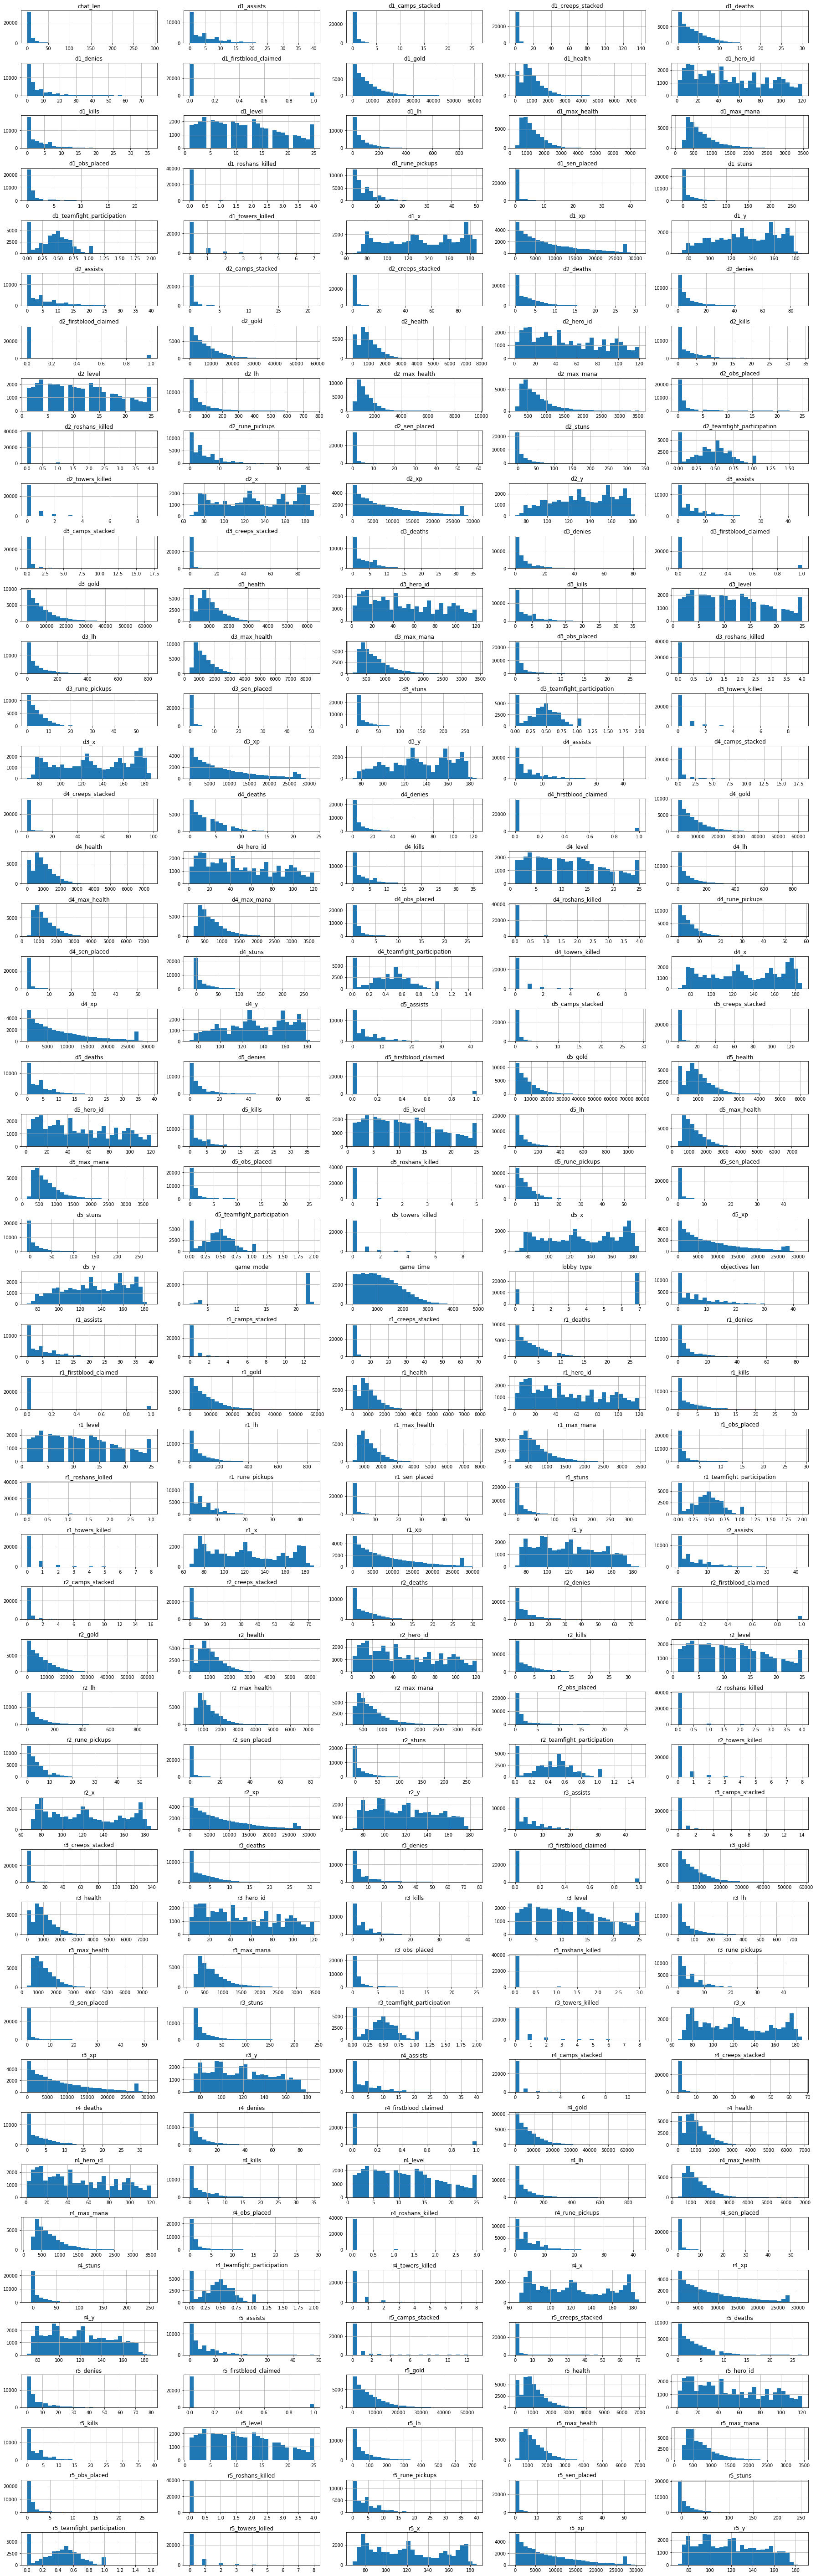

In [19]:
train_X.hist(figsize = (25,80),layout = (50,5), bins=30)
plt.tight_layout()
plt.show()

Conclusions about numerical variables:
* a lot of the features have very strong right skewness, but have no obvious outliers

Conclusions about categorical variables:
* firstblood_claimed : categorical, binary
* game_mode: categorical, non-ordinal --> needs to be converted to dummy variables
* lobby_type: categorical, binary (value 7 chould be changes with 1)
* hero_id: categorical, may be ordinal
* level: categorical, ordinal (25 levels)
* x,y are coordinates of players (show some structure: see below)

# Coordinates of the players

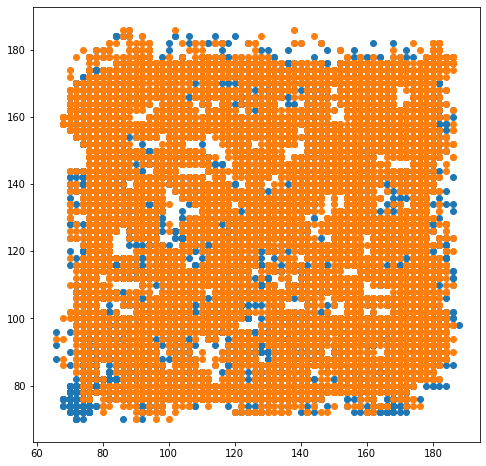

In [21]:
# exploring coordinates
x1 = train_X['r1_x']
y1 = train_X['r1_y']

x2 = train_X['d1_x']
y2 = train_X['d1_y']

plt.figure(figsize=(8,8))
plt.scatter(x1,y1)
plt.scatter(x2,y2)

Bottom left corner is only occupied by Dire team and top right corner is occupied by Radiant players only. The position of the filed should be also explored for the cases of Radiant's victory.

In [23]:
train_X_radiant = train_X[target.radiant_win]
train_X_dire = train_X[~target.radiant_win]

Text(0.5, 1.0, 'Dire')

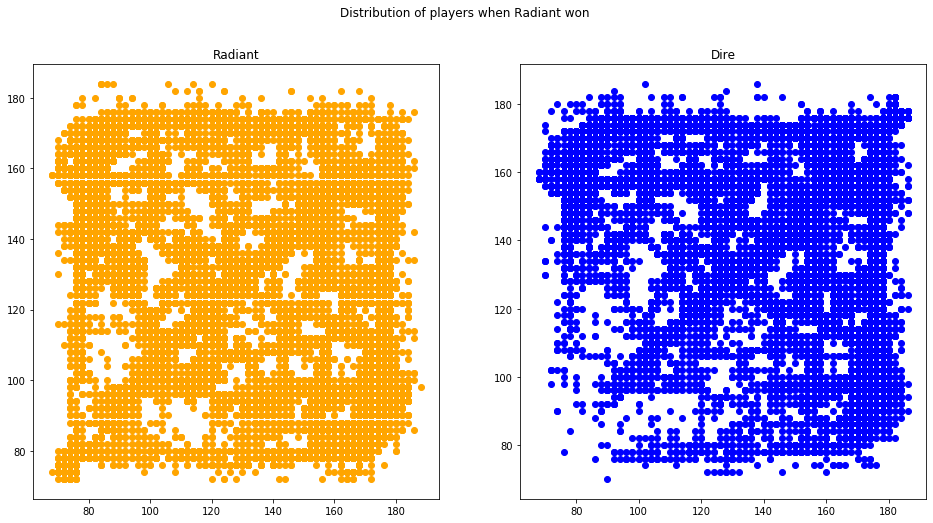

In [24]:
# coordinates distribution when Radiant won
x1 = train_X_radiant['r1_x']
y1 = train_X_radiant['r1_y']

x2 = train_X_radiant['d1_x']
y2 = train_X_radiant['d1_y']

fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(16,8))
fig.suptitle('Distribution of players when Radiant won')
ax1.scatter(x1,y1, color = 'orange')
ax1.set_title('Radiant')
ax2.scatter(x2,y2, color = 'blue')
ax2.set_title('Dire')



Text(0.5, 1.0, 'Dire')

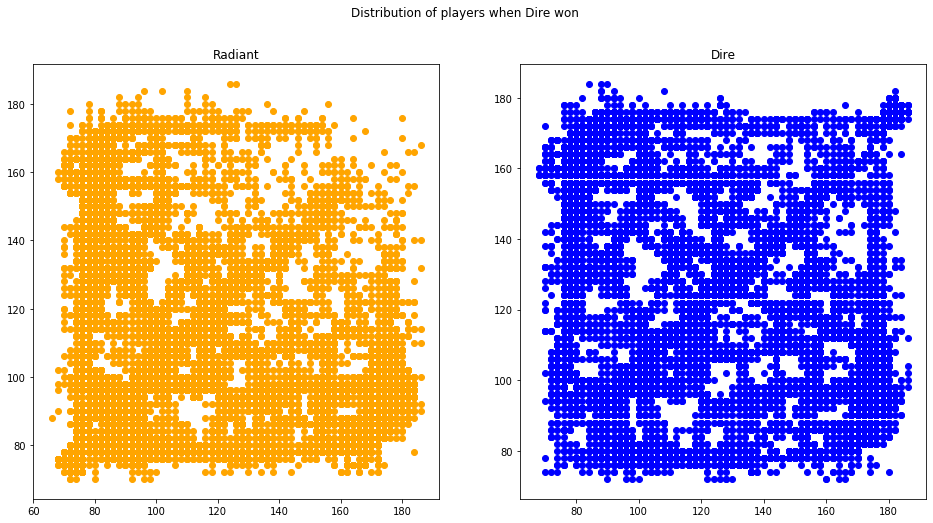

In [25]:
# coordinates distribution when Radiant lost
x1 = train_X_dire['r2_x']
y1 = train_X_dire['r2_y']

x2 = train_X_dire['d3_x']
y2 = train_X_dire['d3_y']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle('Distribution of players when Dire won')
ax1.scatter(x1,y1, color = 'orange')
ax1.set_title('Radiant')
ax2.scatter(x2,y2, color = 'blue')
ax2.set_title('Dire')


Indeed, the distribution of the players on the map is different in cases when Radiant won or not. The players of the team that has won are spread, on average, over the whole field. But the team, which has lost, has much more dense presence at its base and less dense presence at the opponent's base. The base for the Radiant is bottom left corner and the base for Dire is upper right corner. A new feature can be built based on coordinates: 'presence_at_opponent_base' which can be binary or an average of indicator function for all five players of the team.

In [26]:
# identifying bases

print('Radiant: from x = {}, y = {}   to   x = {}, y = {}'.format(x1.min(), y1.min(), x1.min()+30, y1.min()+30))
print('Dire: from x = {}, y = {}   to   x = {}, y = {}'.format(x2.max()-30,y2.max()-30,x2.max(), y2.max()))

radiant_base_x = 96
radiant_base_y = 100

dire_base_x = 156
dire_base_y = 156

Radiant: from x = 66, y = 70   to   x = 96, y = 100
Dire: from x = 156, y = 154   to   x = 186, y = 184


Text(0.5, 1.0, 'Average y-coordinate of Dire players')

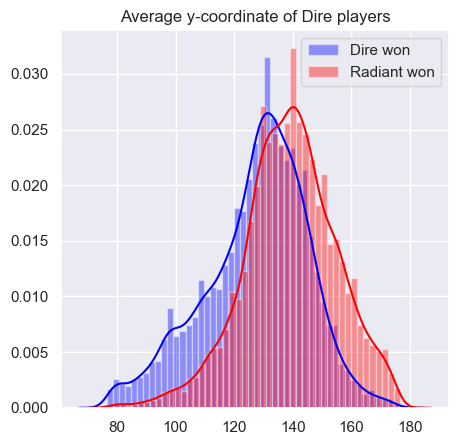

In [40]:
# looking at the differnce of average y coordinates of players when the team lost or won
d_y_d_win = train_X_dire[['d1_y', 'd2_y', 'd3_y','d4_y','d5_y']].mean(axis = 1)
d_y_r_win = train_X_radiant[['d1_y', 'd2_y', 'd3_y','d4_y','d5_y']].mean(axis = 1)
sns.set(rc={'figure.figsize':(5,5)})
sns.set(font_scale = 1)
ax = sns.distplot( d_y_d_win  , color="blue", label='Dire won')
ax = sns.distplot( d_y_r_win  , color="red", label='Radiant won')
ax.legend()
ax.set_title('Average y-coordinate of Dire players')


Text(0.5, 1.0, 'Average x-coordinate of Dire players')

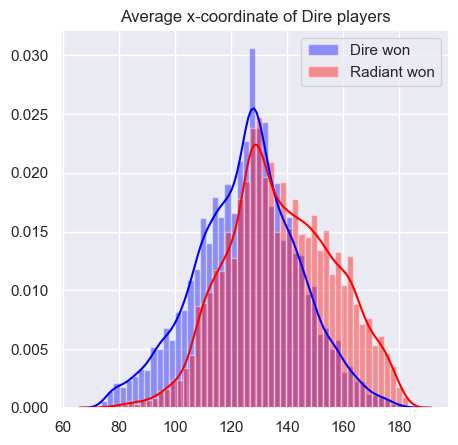

In [41]:
# looking at the differnce of average x coordinates of players when the team lost or won
d_x_d_win = train_X_dire[['d1_x', 'd2_x', 'd3_x','d4_x','d5_x']].mean(axis = 1)
d_x_r_win = train_X_radiant[['d1_x', 'd2_x', 'd3_x','d4_x','d5_x']].mean(axis = 1)
sns.set(rc={'figure.figsize':(5,5)})
sns.set(font_scale = 1)
ax = sns.distplot( d_x_d_win  , color="blue", label='Dire won')
ax = sns.distplot( d_x_r_win  , color="red", label='Radiant won')
ax.legend()
ax.set_title('Average x-coordinate of Dire players')

Conclusions:
* coordinates of players are important indicators of the winning or loosing the game
* mean() - aggreagation should be kept
* indicator function ('in_opponent_base') of each player should be added

# Check the binary features

### First blood claimed

In [47]:
new_features = pd.DataFrame(index=train_X.index)
# look at firstblood_claimed though all players
r_firstblood_claimed = ['r{}_firstblood_claimed'.format(i) for i in range(1,6)]
d_firstblood_claimed = ['d{}_firstblood_claimed'.format(i) for i in range(1,6)]
firstblood_claimed = r_firstblood_claimed+d_firstblood_claimed
print(full_df.loc[:,firstblood_claimed].sum(axis=1).value_counts())

1    36471
0     3204
dtype: int64


In [51]:
# first_blood_claimed by Radiant
new_features['r_firstblood_claimed'] = full_df.loc[:,r_firstblood_claimed].sum(axis=1)
# first_blood_claimed by Dire
new_features['d_firstblood_claimed'] = full_df.loc[:,d_firstblood_claimed].sum(axis=1)
new_features['radiant_win'] = full_df['radiant_win']

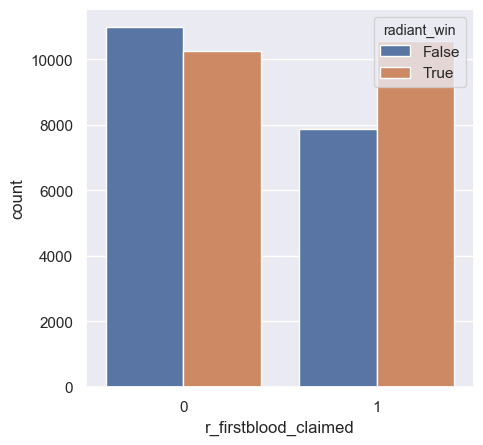

In [52]:
sns.countplot(x="r_firstblood_claimed", hue="radiant_win", data=new_features)

### Lobby type

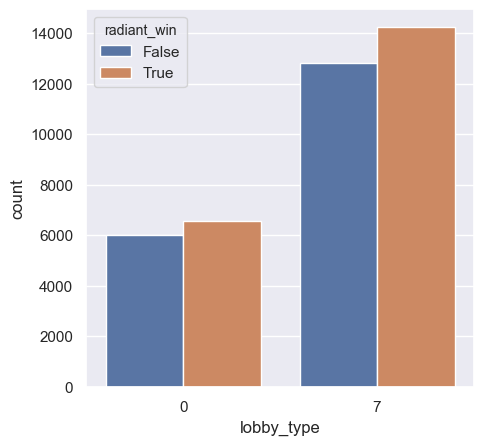

In [50]:
sns.countplot(x="lobby_type", hue="radiant_win", data=full_df)

# Check numerical features

### Chat length

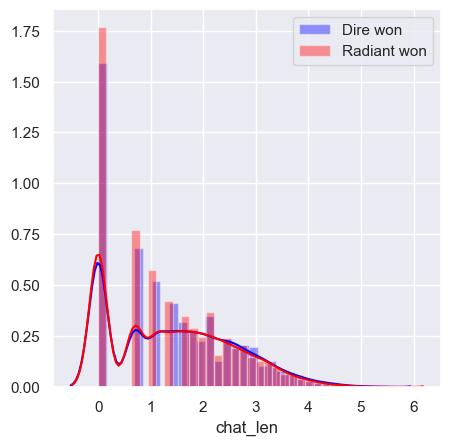

In [73]:
import math
chat_dire_won = train_X_dire['chat_len'].apply(lambda x: math.log(x+1))
chat_radiant_won = train_X_radiant['chat_len'].apply(lambda x: math.log(x+1))
sns.set(rc={'figure.figsize':(5,5)})
sns.set(font_scale = 1)
ax = sns.distplot( chat_dire_won  , color="blue", label='Dire won')
ax = sns.distplot( chat_radiant_won  , color="red", label='Radiant won')
ax.legend()

In [74]:
train_X_dire['chat_len'].mean()

7.651546501140644

In [75]:
train_X_radiant['chat_len'].mean()

7.05517142033996

Games where Radiant team wins tend to have shorter chat length.

# towers_killed (and similar)

In [77]:
d_towers_killed = ['d{}_towers_killed'.format(i) for i in range(1,6)]
r_towers_killed = ['r{}_towers_killed'.format(i) for i in range(1,6)]
new_features['d_towers_killed'] = train_X.loc[:,d_towers_killed].sum(axis=1)
new_features['r_towers_killed'] = train_X.loc[:,r_towers_killed].sum(axis=1)


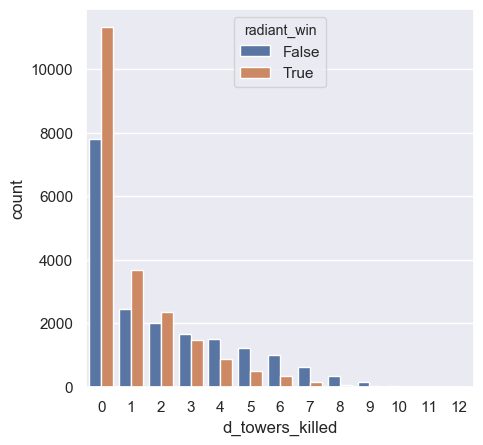

In [79]:
sns.countplot(x="d_towers_killed", hue="radiant_win", data=new_features)

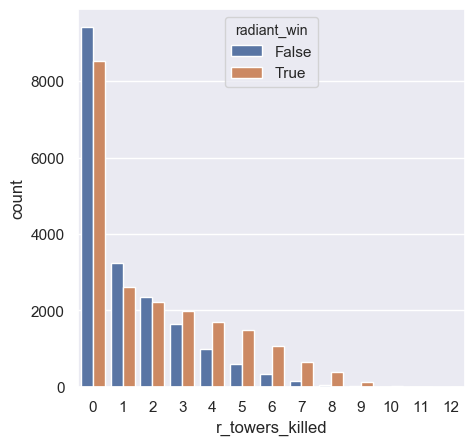

In [80]:
sns.countplot(x="r_towers_killed", hue="radiant_win", data=new_features)

# Hero_id

Text(0.5, 1.0, 'sum of hero_id of Dire players')

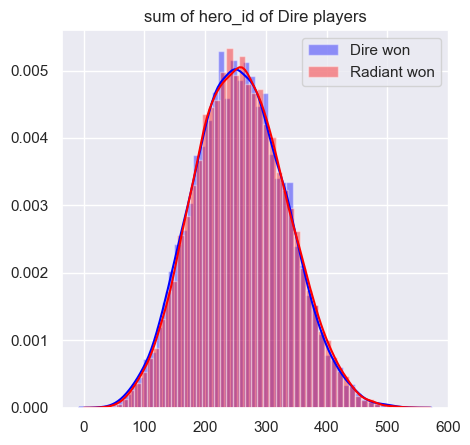

In [83]:
d_hero_id_d_win = train_X_dire[['d1_hero_id', 'd2_hero_id', 'd3_hero_id','d4_hero_id','d5_hero_id']].sum(axis = 1)
d_hero_id_r_win = train_X_radiant[['d1_hero_id', 'd2_hero_id', 'd3_hero_id','d4_hero_id','d5_hero_id']].sum(axis = 1)
sns.set(rc={'figure.figsize':(5,5)})
sns.set(font_scale = 1)
ax = sns.distplot( d_hero_id_d_win  , color="blue", label='Dire won')
ax = sns.distplot( d_hero_id_r_win  , color="red", label='Radiant won')
ax.legend()
ax.set_title('sum of hero_id of Dire players')

Text(0.5, 1.0, 'sum of hero_id of Radiant players')

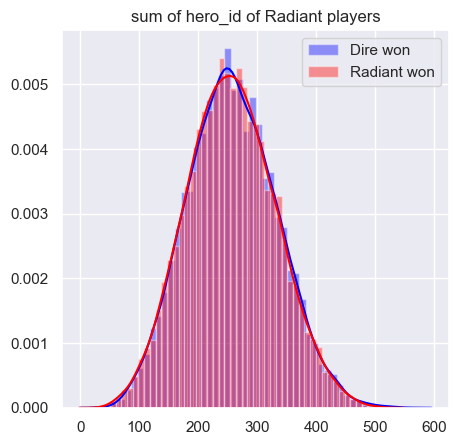

In [84]:
r_hero_id_d_win = train_X_dire[['r1_hero_id', 'r2_hero_id', 'r3_hero_id','r4_hero_id','r5_hero_id']].sum(axis = 1)
r_hero_id_r_win = train_X_radiant[['r1_hero_id', 'r2_hero_id', 'r3_hero_id','r4_hero_id','r5_hero_id']].sum(axis = 1)
sns.set(rc={'figure.figsize':(5,5)})
sns.set(font_scale = 1)
ax = sns.distplot( r_hero_id_d_win  , color="blue", label='Dire won')
ax = sns.distplot( r_hero_id_r_win  , color="red", label='Radiant won')
ax.legend()
ax.set_title('sum of hero_id of Radiant players')

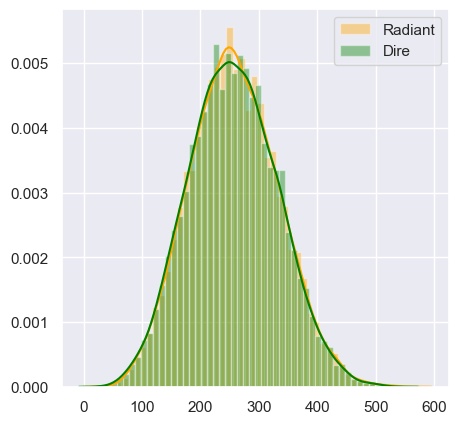

In [87]:
sns.set(font_scale = 1)
ax = sns.distplot( r_hero_id_d_win  , color="orange", label='Radiant')
ax = sns.distplot( d_hero_id_d_win  , color="green", label='Dire')
ax.legend()

Teams with smaller sum of hero ids tend to win the game.